# Spark RDD

### 스파크 기본설정

In [2]:
import os
import sys

#home=os.path.expanduser("~") # HOME이 설정되어 있지 않으면 expanduser('~')를 사용한다.
#osn.environ["PYSPARK_PYTHON"] = "/usr/bin/python"
os.environ["SPARK_HOME"]=os.path.join(os.path.expanduser("~"),r"C:\Users\user\spark-2.0.0-bin-hadoop2.7\spark-2.0.0-bin-hadoop2.7")
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [11]:
import pyspark
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", r"C:\Users\user\MyStudySpace\2019-2\BigData_Spark\src")\
    .getOrCreate()

## RDD 생성

### List에서 RDD 생성하기

In [6]:
myList = [1,2,3,4,5,6,7]
myRdd1 = spark.sparkContext.parallelize(myList)

myRdd1.take(3)

[1, 2, 3]

### 파일에서 RDD 생성하기

In [7]:
%%writefile data/ds_spark_wiki.txt
Wikipedia
Apache Spark is an open source cluster computing framework.
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
Apache Spark Apache Spark Apache Spark Apache Spark
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
Originally developed at the University of California, Berkeley's AMPLab,
the Spark codebase was later donated to the Apache Software Foundation,
which has maintained it since.
Spark provides an interface for programming entire clusters with
implicit data parallelism and fault-tolerance.

Writing data/ds_spark_wiki.txt


In [8]:
myRdd2 = spark.sparkContext\
    .textFile(os.path.join("data", "ds_spark_wiki.txt"))

myRdd2.first() # 첫 데이터만 조회하는 action 함수

u'Wikipedia'

#### 파일에서 df 생성

In [12]:
import os
myDf = spark.read.text(os.path.join("data", "ds_spark_wiki.txt"))
print myDf.first()

Row(value=u'Wikipedia')


In [13]:
print type(myDf)

<class 'pyspark.sql.dataframe.DataFrame'>


- csv에서 RDD 생성하기

In [17]:
%%writefile ./data/ds_spark_2cols.csv
35, 2
40, 27
12, 38
15, 31
21, 1
14, 19
46, 1
10, 34
28, 3
48, 1
16, 2
30, 3
32, 2
48, 1
31, 2
22, 1
12, 3
39, 29
19, 37
25, 2

Writing ./data/ds_spark_2cols.csv


- take()를 하면 그 결과는 리스트가 됨

In [18]:
myRdd4 = spark.sparkContext\
    .textFile(os.path.join("data", "ds_spark_2cols.csv"))
myRdd4.take(5)

[u'35, 2', u'40, 27', u'12, 38', u'15, 31', u'21, 1']

In [19]:
myList=myRdd4.take(5)
print type(myList)

<type 'list'>


- 2차원 리스트를 만들땐 map()함수!!

In [20]:
myRdd5 = myRdd4.map(lambda line: line.split(','))
myRdd5.take(5)

[[u'35', u' 2'],
 [u'40', u' 27'],
 [u'12', u' 38'],
 [u'15', u' 31'],
 [u'21', u' 1']]

In [21]:
celcius = [39.2, 36.5, 37.3, 37.8]
def c2f(c) :
    return (float(9)/5)*c +32
f=map(c2f,celcius)
print f

[102.56, 97.7, 99.14, 100.03999999999999]


- lambda는 무명 함수이므로 함수 선언이 별도 필요 X
- 처리 결과는 'return'을 사용하지 않아도 반환

In [22]:
def f(x):
    return x*2
y=f(1)
print y

2


In [24]:
y= lambda x:x*2
print y(1)

2


In [25]:
map(lambda c:(float(9)/5)*c +32, celcius)

[102.56, 97.7, 99.14, 100.03999999999999]

- 문자열에 map 사용해보기

In [26]:
sentence = "Hello World"
map(lambda x:x.split(), sentence)    # 철자가 요소

[['H'], ['e'], ['l'], ['l'], ['o'], [], ['W'], ['o'], ['r'], ['l'], ['d']]

In [27]:
sentence = ["Hello World", "Good Morining"]
map(lambda x:x.split(), sentence)   # 단어가 요소

[['Hello', 'World'], ['Good', 'Morining']]

- filter() : 데이터 선별

In [28]:
fib = [0,1,1,2,3,5,8,13,21,34,55]
result = filter(lambda x: x%2, fib)
print result

[1, 1, 3, 5, 13, 21, 55]


- reduce() : 함수와 데이터 2개의 인자를 받고 반복문 필요 x

In [29]:
# x가 앞의 x+y값으로 초기화(like 누적합 원리)
reduce(lambda x, y: x+y, range(1,101))

5050

## RDD 사용하기

### map

In [31]:
nRdd = spark.sparkContext.parallelize([1,2,3,4])
squared = nRdd.map(lambda x: x*x)
print squared

PythonRDD[16] at RDD at PythonRDD.scala:48


위처럼 RDD를 프린트한다고 내부가 보이지는 X

In [32]:
print squared.collect()

[1, 4, 9, 16]


### reduce

In [35]:
myRdd100 = spark.sparkContext.parallelize(range(1,101))
myRdd100.reduce(lambda x,y: x+y)

5050

### 단순 통계 기능

In [37]:
print "sum: ",nRdd.sum()
print "min: ",nRdd.min()
print "max: ", nRdd.max()
print "standard deviation:", nRdd.stdev()
print "variance: ", nRdd.variance()

sum:  10
min:  1
max:  4
standard deviation: 1.118033988749895
variance:  1.25


### filter()

In [41]:
myRdd_spark=myRdd2.filter(lambda line : "Spark" in line)
print "How many lines having 'Spark': ", myRdd_spark.count()

How many lines having 'Spark':  4


In [42]:
myRdd_unicode = myRdd2.filter(lambda line: u"스파크" in line)
print myRdd_unicode.first()

아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.


- filter()를 사용해서 stopwords 제거하기

In [43]:
stopwords = ['is','am','are','the','for','a', 'an', 'at']
myRdd_stop = myRdd2.flatMap(lambda x:x.split())\
                    .filter(lambda x: x not in stopwords)

In [44]:
for words in myRdd_stop.collect():
    print words

Wikipedia
Apache
Spark
open
source
cluster
computing
framework.
아파치
스파크는
오픈
소스
클러스터
컴퓨팅
프레임워크이다.
Apache
Spark
Apache
Spark
Apache
Spark
Apache
Spark
아파치
스파크
아파치
스파크
아파치
스파크
아파치
스파크
Originally
developed
University
of
California,
Berkeley's
AMPLab,
Spark
codebase
was
later
donated
to
Apache
Software
Foundation,
which
has
maintained
it
since.
Spark
provides
interface
programming
entire
clusters
with
implicit
data
parallelism
and
fault-tolerance.


### map()함수로 단어 분리

In [49]:
myRdd2=spark.sparkContext\
    .textFile(os.path.join("data", "ds_spark_wiki.txt"))
sentences=myRdd2.map(lambda x:x.split(" "))
sentences.count()

10

In [46]:
def mySplit(x):
    return x.split(" ")

sentences2=myRdd2.map(mySplit)
sentences2.count()

10

In [47]:
sentences.take(3)

[[u'Wikipedia'],
 [u'Apache',
  u'Spark',
  u'is',
  u'an',
  u'open',
  u'source',
  u'cluster',
  u'computing',
  u'framework.'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c\ub294',
  u'\uc624\ud508',
  u'\uc18c\uc2a4',
  u'\ud074\ub7ec\uc2a4\ud130',
  u'\ucef4\ud4e8\ud305',
  u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.']]

위처럼 말고 문장을 출력하려면 반복문 사용할 것

In [50]:
for line in sentences.collect() :
    for word in line:
        print word,
    print "\n-----"

Wikipedia 
-----
Apache Spark is an open source cluster computing framework. 
-----
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. 
-----
Apache Spark Apache Spark Apache Spark Apache Spark 
-----
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 
-----
Originally developed at the University of California, Berkeley's AMPLab, 
-----
the Spark codebase was later donated to the Apache Software Foundation, 
-----
which has maintained it since. 
-----
Spark provides an interface for programming entire clusters with 
-----
implicit data parallelism and fault-tolerance. 
-----


- 문장의 철자 갯수 세어보기

In [51]:
len("Apache Spark is an open source cluster computing framework")

58

In [52]:
myRdd2.map(lambda s:len(s)).collect()

[9, 59, 32, 51, 31, 72, 71, 30, 64, 46]

- 리스트에 RDD 만들어 간단한 문자 처리 기능 (대소문자 변환)

In [53]:
myList=["this is", "a line"]
_rdd=spark.sparkContext.parallelize(myList)

wordsRdd=_rdd.map(lambda x:x.split())
print wordsRdd.collect()

[['this', 'is'], ['a', 'line']]


In [54]:
repRdd=_rdd.map(lambda x:x.replace("a","AA"))
repRdd.take(10)

['this is', 'AA line']

위 명령어는 출력되는 결과만 바뀐 것, 실제 RDD 수정 불가능

- 첫글자를 대문자로 만들어서 출력하기
- 첫째 요소 x[0]는 리스트 각 요소의 첫째 단어 'this', 'a'를 대문자로 변환

In [56]:
upperRDD = wordsRdd.map(lambda x: x[0].upper())
print upperRDD.collect()

['THIS', 'A']


In [59]:
upper2RDD = wordsRdd.map(lambda x: [i.upper() for i in x])
print upper2RDD.collect()

[['THIS', 'IS'], ['A', 'LINE']]


### pipeline

In [61]:
wordsLength = wordsRdd\
    .map(len)\
    .collect()
print wordsLength

[2, 2]


### 파일에 쓰기

- 리스트를 RDD로 만들어 로컬 파일에 쓰기
- 파일로 쓰이려면 rdd.coalesce()를 사용

In [69]:

_rdd=spark.sparkContext.textFile("data/ds_spark_wiki_out")
_rdd.collect()

[u"['THIS', 'IS']", u"['A', 'LINE']"]

### groupBy
- 데이터를 딕셔너리처럼 만들어서 키를 선책하여 사용할 수 있는 장점

In [78]:
myRdd_group=myRdd2.groupBy(lambda x:x[0:2])
for (k,v) in myRdd_group.collect():
    for eachValue in v:
        print k, eachValue
    print "-----"

아파 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
아파 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
-----
im implicit data parallelism and fault-tolerance.
-----
th the Spark codebase was later donated to the Apache Software Foundation,
-----
Wi Wikipedia
-----
Ap Apache Spark is an open source cluster computing framework.
Ap Apache Spark Apache Spark Apache Spark Apache Spark
-----
Sp Spark provides an interface for programming entire clusters with
-----
Or Originally developed at the University of California, Berkeley's AMPLab,
-----
wh which has maintained it since.
-----


In [80]:
_testList=[("key1",1),("key1",1),("key1",1),("key2",1),("key2",1),
           ("key1",1),("key2",1),
           ("key1",1),("key1",1),("key2",1),("key2",1)]
_testRdd=spark.sparkContext.parallelize(_testList)

In [81]:
_testRdd.groupBy(lambda x:x[0].collect())

PythonRDD[133] at RDD at PythonRDD.scala:48

## Pair RDD
- key,value 쌍으로 구성된 RDD

### Pair RDD 생성

In [82]:
_testList=[("key1",1),("key1",1),("key1",1),("key2",1),("key2",1),
           ("key1",1),("key2",1),
           ("key1",1),("key1",1),("key2",1),("key2",1)]
_testRdd=spark.sparkContext.parallelize(_testList)

In [83]:
_testRdd.keys().collect()

['key1',
 'key1',
 'key1',
 'key2',
 'key2',
 'key1',
 'key2',
 'key1',
 'key1',
 'key2',
 'key2']

### groupByKey, reduceByKey, mapValues

In [84]:
_testRdd.reduceByKey(lambda x,y:x+y).collect()

[('key2', 5), ('key1', 6)]

In [85]:
_testRdd.groupByKey().collect()

[('key2', <pyspark.resultiterable.ResultIterable at 0x6c5f4e0>),
 ('key1', <pyspark.resultiterable.ResultIterable at 0x6c5f550>)]

In [86]:
_testRdd.groupByKey().mapValues(list).collect()

[('key2', [1, 1, 1, 1, 1]), ('key1', [1, 1, 1, 1, 1, 1])]

In [87]:
_testRdd.mapValues(lambda x:x+1).collect()

[('key1', 2),
 ('key1', 2),
 ('key1', 2),
 ('key2', 2),
 ('key2', 2),
 ('key1', 2),
 ('key2', 2),
 ('key1', 2),
 ('key1', 2),
 ('key2', 2),
 ('key2', 2)]

### 단어빈도 예제

In [88]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\
    .take(3)

[(u'and', <pyspark.resultiterable.ResultIterable at 0x4ef59e8>),
 (u'\uc18c\uc2a4', <pyspark.resultiterable.ResultIterable at 0x4ef5fd0>),
 (u'is', <pyspark.resultiterable.ResultIterable at 0x6c78f98>)]

In [89]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\
    .mapValues(sum)\
    .take(20)

[(u'and', 1),
 (u'\uc18c\uc2a4', 1),
 (u'is', 1),
 (u'Wikipedia', 1),
 (u'AMPLab,', 1),
 (u'maintained', 1),
 (u'donated', 1),
 (u'\ucef4\ud4e8\ud305', 1),
 (u'open', 1),
 (u'since.', 1),
 (u'for', 1),
 (u'\ud074\ub7ec\uc2a4\ud130', 1),
 (u'with', 1),
 (u'framework.', 1),
 (u'provides', 1),
 (u'Apache', 6),
 (u'Spark', 7),
 (u'was', 1),
 (u'Originally', 1),
 (u'which', 1)]

In [93]:
def f(x): return len(x)
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\
    .mapValues(f)\
    .sortByKey(True)\
    .take(10)

[(u'AMPLab,', 1),
 (u'Apache', 6),
 (u"Berkeley's", 1),
 (u'California,', 1),
 (u'Foundation,', 1),
 (u'Originally', 1),
 (u'Software', 1),
 (u'Spark', 7),
 (u'University', 1),
 (u'Wikipedia', 1)]

In [95]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .collect()

[(u'and', 1),
 (u'\uc18c\uc2a4', 1),
 (u'is', 1),
 (u'Wikipedia', 1),
 (u'AMPLab,', 1),
 (u'maintained', 1),
 (u'donated', 1),
 (u'\ucef4\ud4e8\ud305', 1),
 (u'open', 1),
 (u'since.', 1),
 (u'for', 1),
 (u'\ud074\ub7ec\uc2a4\ud130', 1),
 (u'with', 1),
 (u'framework.', 1),
 (u'provides', 1),
 (u'Apache', 6),
 (u'Spark', 7),
 (u'was', 1),
 (u'Originally', 1),
 (u'which', 1),
 (u'fault-tolerance.', 1),
 (u'University', 1),
 (u'codebase', 1),
 (u'interface', 1),
 (u'data', 1),
 (u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.', 1),
 (u'Foundation,', 1),
 (u'\uc624\ud508', 1),
 (u'programming', 1),
 (u'\uc2a4\ud30c\ud06c\ub294', 1),
 (u'the', 3),
 (u'entire', 1),
 (u'has', 1),
 (u'to', 1),
 (u'later', 1),
 (u'computing', 1),
 (u'Software', 1),
 (u'developed', 1),
 (u"Berkeley's", 1),
 (u'it', 1),
 (u'an', 2),
 (u'cluster', 1),
 (u'implicit', 1),
 (u'at', 1),
 (u'\uc2a4\ud30c\ud06c', 4),
 (u'of', 1),
 (u'clusters', 1),
 (u'parallelism', 1),
 (u'\uc544\ud30c\uce58', 5),
 (u'California,', 1),
 (

### countByKey
- 결과는 dictionary로 출력
- coutByKey().items()하면 리스트로 변환
- countByKey()는 dictionary로 병합하는 반면, reduceByKey()는 (K,V)로 계산

In [96]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .countByKey()

defaultdict(int,
            {u'AMPLab,': 1,
             u'Apache': 6,
             u"Berkeley's": 1,
             u'California,': 1,
             u'Foundation,': 1,
             u'Originally': 1,
             u'Software': 1,
             u'Spark': 7,
             u'University': 1,
             u'Wikipedia': 1,
             u'an': 2,
             u'and': 1,
             u'at': 1,
             u'cluster': 1,
             u'clusters': 1,
             u'codebase': 1,
             u'computing': 1,
             u'data': 1,
             u'developed': 1,
             u'donated': 1,
             u'entire': 1,
             u'fault-tolerance.': 1,
             u'for': 1,
             u'framework.': 1,
             u'has': 1,
             u'implicit': 1,
             u'interface': 1,
             u'is': 1,
             u'it': 1,
             u'later': 1,
             u'maintained': 1,
             u'of': 1,
             u'open': 1,
             u'parallelism': 1,
             u'programming': 1,


### 단어 빈도로 그래프
- x축은 barh()로 개수를 나타내고 y축은 단어를 나타냄.

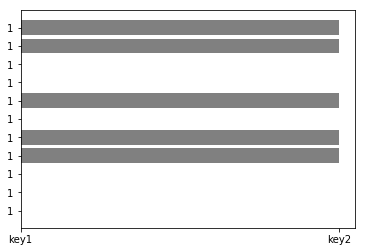

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

count = map(lambda x:x[0], _testList)
word = map(lambda x:x[1], _testList)
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()

### combineByKey

In [102]:
marks = spark.sparkContext.parallelize([('kim',86),('lim',87),('kim',75),
                                      ('kim',91),('lim',78),('lim',92),
                                      ('lim',79),('lee',99)])
marksByKey = marks.combineByKey(lambda value: (value,1),
                               lambda x,value: (x[0]+value, x[1]+1),
                               lambda x,y: (x[0]+y[0], x[1]+y[1]))
marksByKey.collect()

[('lim', (336, 4)), ('lee', (99, 1)), ('kim', (252, 3))]

In [109]:
heights = spark.sparkContext.parallelize([
        ('M',182.),('F',164.),('M',180.),('M',185.),('M',171.),('F',162.)
    ])
heightsByKey = heights.combineByKey(lambda value: (value,1),
                                   lambda x,value: (x[0]+value, x[1]+1),
                                   lambda x,y: (x[0]+y[0], x[1]+y[1]))
heightsByKey.collect()

[('M', (718.0, 4)), ('F', (326.0, 2))]

In [111]:
avgByKey = heightsByKey.map(lambda (x,(sum,count)):(x,float(sum)/count))

avgByKey.collect()

[('M', 179.5), ('F', 163.0)]

In [103]:
_testRdd.combineByKey(lambda value: (value,1),
                     lambda x,value: (x[0]+value, x[1]+1),
                     lambda x,y: (x[0]+y[0], x[1]+y[1])) \
        .collect()

[('key2', (5, 5)), ('key1', (6, 6))]

In [104]:
_testRdd.combineByKey(lambda value: (value,1),
                     lambda hap,count: (hap[0]+count, hap[1]+1),
                     lambda x,y: (x[0]+y[0], x[1]+y[1])) \
        .collect()

[('key2', (5, 5)), ('key1', (6, 6))]

- 평균 구하기

In [107]:
_testCbkRdd=_testRdd.combineByKey(lambda value: (value,1),
                                 lambda x,value: (x[0]+value, x[1]+1),
                                 lambda x,y: (x[0]+y[0], x[1]+y[1]))

averageByKey = _testCbkRdd.map(lambda (key, (sum,count)): (key,float(sum)/count))
averageByKey.collectAsMap()

{'key1': 1.0, 'key2': 1.0}

## 문제) 성적 합계 및 평균

### RDD 생성

In [113]:
marks=[
    "'김하나','English', 100",
    "'김하나','Math', 80",
    "'임하나','English', 70",
    "'임하나','Math', 100",
    "'김갑돌','English', 82.3",
    "'김갑돌','Math', 98.5"
]
_marksRdd=spark.sparkContext.parallelize(marks)

### 문제 3-1
개인별 데이터를 컴마로 분리하고, 이름 x[0]과 성적 x[2]만 꺼내어 reduceBykey()를 구하면 합계를 구할 수 있다. 여기서 중요한 것은 기존 데이터에서 필요한 이름, 성적만을 꺼내어 처리한다는 점이다.

In [116]:
_marksbyname =_marksRdd\
    .map(lambda x:x.split(','))\
    .map(lambda x:(x[0], float(x[2])))\
    .reduceByKey(lambda x,y:x+y)\
    .collect()
for i in _marksbyname:
    print i[0],i[1]

'임하나' 170.0
'김하나' 180.0
'김갑돌' 180.8


### 문제  3-2
개인별 데이터를 컴마로 분리하고, 과목 x[1]과 성적 x[2]만 꺼내어 reduceBykey()를 구하면 합계를 구할 수 있다.

In [117]:
_marksbysubject =_marksRdd\
    .map(lambda x:x.split(','))\
    .map(lambda x:(x[1],float(x[2])))\
    .reduceByKey(lambda x,y: x+y)\
    .collect()
for i in _marksbysubject:
    print i[0],i[1]

'English' 252.3
'Math' 278.5


### 문제 3-3
합계, 개수를 계산해 보자. combineByKey()를 이용해서 계산해야 한다. 먼저 데이터를 이름, 과목, 데이터 -> 이름, 점수로 변경한다.

In [119]:
_marksbyname2=_marksRdd\
    .map(lambda x:x.split(','))\
    .map(lambda x:(x[0], float(x[2])))

In [120]:
sum_counts=_marksbyname2.combineByKey(
    (lambda x: (x,1)),
    (lambda acc, value: (acc[0]+value, acc[1]+1)),
    (lambda acc1, acc2: (acc1[0]+acc2[0], acc1[1]+acc2[1]))
)

In [125]:
for i in sum_counts.collect():
    for each in i:
        print each,

'임하나' (170.0, 2) '김하나' (180.0, 2) '김갑돌' (180.8, 2)


### 문제 3-4
개인별 평균은 3-3에서 구했던 합계, 개수를 사용하여 계산한다. 평균을 계산하기 위해 float() 형변환을 해주었다.

In [127]:
# average
averageByKey = sum_counts\
    .map(lambda (key,(sum,count)):(key,float(sum)/count))\
    .collect()
for i in averageByKey:
    for j in i:
        print j,
    print

'임하나' 85.0
'김하나' 90.0
'김갑돌' 90.4


## 문제 S-4: 서울시 지하철호선별 승차인원 평균 구하기.
### 문제
정량데이터는 보통 집단화하여 빈도, 평균, 합계 등 서술통계를 계산한다. 서울시 지하철호선별 역별 승하차 인원 정보를 가져와 평균을 구해보자.

    - 파일 명 CARD_SUBWAY_MONTH_201501.csv를 다운로드 받아서 일부만 테스트용 데이터로 사용한다.
    - 오픈API 샘플URL http://openapi.seoul.go.kr:8088/(인증키)/xml/CardSubwayStatsNew/1/5/20151101
### 해결
PairRDD를 사용한다.

### RDD 생성

In [129]:
_sub=["20150101,2호선,0236,영등포구청,6199,6219",
"20150101,2호선,0237,당산,7982,8946",
"20150101,2호선,0238,합정,17406,15241",
"20150101,3호선,0309,지축,515,538",
"20150101,3호선,0310,구파발,6879,6260",
"20150101,3호선,0311,연신내,20031,19470",
"20150101,3호선,0312,불광,9519,11029",
"20150101,4호선,0425,회현,7465,7574",
"20150101,4호선,0426,서울역,3943,10823",
"20150101,경부선,1002,남영,4340,4535",
"20150101,경부선,1003,용산,28980,27684",
"20150101,경부선,1004,노량진,23021,23862",
"20150101,경부선,1005,대방,6360,6476",
"20150101,경부선,1006,영등포,37247,36102",
"20150101,경원선,1008,이촌,1940,1507",
"20150101,경원선,1009,서빙고,911,1000",
"20150101,경원선,1010,한남,1885,1863",
"20150101,경원선,1011,옥수,43,37"]

In [130]:
_subRdd = spark.sparkContext.parallelize(_sub)

### 데이터정리

In [131]:
for i in _subRdd.map(lambda x:x.split(',')).collect():
    for j in i:
        print j,
    print

20150101 2호선 0236 영등포구청 6199 6219
20150101 2호선 0237 당산 7982 8946
20150101 2호선 0238 합정 17406 15241
20150101 3호선 0309 지축 515 538
20150101 3호선 0310 구파발 6879 6260
20150101 3호선 0311 연신내 20031 19470
20150101 3호선 0312 불광 9519 11029
20150101 4호선 0425 회현 7465 7574
20150101 4호선 0426 서울역 3943 10823
20150101 경부선 1002 남영 4340 4535
20150101 경부선 1003 용산 28980 27684
20150101 경부선 1004 노량진 23021 23862
20150101 경부선 1005 대방 6360 6476
20150101 경부선 1006 영등포 37247 36102
20150101 경원선 1008 이촌 1940 1507
20150101 경원선 1009 서빙고 911 1000
20150101 경원선 1010 한남 1885 1863
20150101 경원선 1011 옥수 43 37


In [132]:
_subRdd.map(lambda x:int(x[3])).collect()

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [133]:
_subRdd.map(lambda x:x.split(',')).map(lambda x:int(x[4])).collect()

[6199,
 7982,
 17406,
 515,
 6879,
 20031,
 9519,
 7465,
 3943,
 4340,
 28980,
 23021,
 6360,
 37247,
 1940,
 911,
 1885,
 43]

### 총 승차인원의 합계를 reduce()로 합산

In [134]:
_subRdd.map(lambda x:x.split(',')).map(lambda x:(int(x[4]))).reduce(lambda x,y:x+y)

184666

### 호선별 승차인원 평균을 계산

In [135]:
_subLineByPassengers=_subRdd.map(lambda x:x.split(',')).map(lambda x: (x[1],int(x[4])))
sum_counts = _subLineByPassengers.combineByKey(
    (lambda x: (x, 1)), # the initial value, with value x and count 1
    (lambda acc, value: (acc[0]+value, acc[1]+1)), # how to combine a pair value with the accumulator: sum value, and increment count
    (lambda acc1, acc2: (acc1[0]+acc2[0], acc1[1]+acc2[1])) # combine accumulators
)

In [136]:
for i in sum_counts.collect():
    for each in i:
        print each,
    print

4호선 (11408, 2)
2호선 (31587, 3)
경원선 (4779, 4)
3호선 (36944, 4)
경부선 (99948, 5)


In [137]:
for i in sum_counts.collect():
    print i[0],i[1][0],i[1][1]

4호선 11408 2
2호선 31587 3
경원선 4779 4
3호선 36944 4
경부선 99948 5


In [138]:
averageByKey = sum_counts.map(lambda (key,(sum,count)):(key,float(sum)/count))

In [139]:
averageByKey.collectAsMap()

{'2\xed\x98\xb8\xec\x84\xa0': 10529.0,
 '3\xed\x98\xb8\xec\x84\xa0': 9236.0,
 '4\xed\x98\xb8\xec\x84\xa0': 5704.0,
 '\xea\xb2\xbd\xeb\xb6\x80\xec\x84\xa0': 19989.6,
 '\xea\xb2\xbd\xec\x9b\x90\xec\x84\xa0': 1194.75}

In [140]:
for i in averageByKey.collect():
    for j in i:
        print j,
    print

4호선 5704.0
2호선 10529.0
경원선 1194.75
3호선 9236.0
경부선 19989.6


In [142]:
%%writefile sub/ds_spark_rdd_hello.py
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
import pyspark
def doIt():
    print "---------RESULT-----------"
    print spark.version
    spark.conf.set("spark.logConf","false")
    rdd=spark.sparkContext.parallelize(range(1000), 10)
    print "mean=",rdd.mean()
    nums = spark.sparkContext.parallelize([1, 2, 3, 4])
    squared = nums.map(lambda x: x * x).collect()
    for num in squared:
        print "%i " % (num)

if __name__ == "__main__":
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt()
    spark.stop()

Writing sub/ds_spark_rdd_hello.py


### TF (Term Frequency)
단어빈도를 계산하기 위해 HashingTF를 사용할 수 있다. 단어ID로 Hash 알고리즘에 따라 무작위 번호를 생성하고, 단어빈도를 생성한다.

### 단어분리해서 RDD 생성

In [143]:
wikiRdd3 = spark.sparkContext.textFile("data/ds_spark_wiki.txt")\
    .map(lambda line: line.split(" "))

In [144]:
from pyspark.mllib.feature import HashingTF

hashingTF = HashingTF()
tf = hashingTF.transform(wikiRdd3)
tf.collect()

[SparseVector(1048576, {253068: 1.0}),
 SparseVector(1048576, {36751: 1.0, 50570: 1.0, 68380: 1.0, 415281: 1.0, 511377: 1.0, 728364: 1.0, 862087: 1.0, 938426: 1.0, 999480: 1.0}),
 SparseVector(1048576, {63234: 1.0, 340190: 1.0, 357478: 1.0, 375592: 1.0, 458138: 1.0, 486171: 1.0, 598772: 1.0}),
 SparseVector(1048576, {938426: 4.0, 999480: 4.0}),
 SparseVector(1048576, {486171: 4.0, 1016271: 4.0}),
 SparseVector(1048576, {36757: 1.0, 225801: 1.0, 323305: 1.0, 453405: 1.0, 498679: 1.0, 518030: 1.0, 688842: 1.0, 762570: 1.0, 959994: 1.0}),
 SparseVector(1048576, {420843: 1.0, 550676: 1.0, 725041: 1.0, 782544: 1.0, 938426: 1.0, 959994: 2.0, 991590: 1.0, 993084: 1.0, 996703: 1.0, 999480: 1.0}),
 SparseVector(1048576, {50573: 1.0, 263739: 1.0, 892834: 1.0, 1014710: 1.0, 1035538: 1.0}),
 SparseVector(1048576, {3932: 1.0, 36751: 1.0, 192182: 1.0, 358969: 1.0, 363244: 1.0, 496856: 1.0, 546913: 1.0, 938426: 1.0, 951974: 1.0}),
 SparseVector(1048576, {69621: 1.0, 157580: 1.0, 219357: 1.0, 297436: 